**The given dataset contains the price of a second-hand Hyundai grand i10 car
 with respect to year of making. Find the best linear relationship between year
 and price. Can you predict the possible price of a 2022 model second-hand
 grand i10?
 Please learn about lasso regression and create a model along with linear
 regression. Find out which one is performing better.**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('car_age_price.csv')

In [17]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [18]:
df.isna().sum()

,0
Year,0
Price,0


In [23]:
x = df[['Year']]
y = df['Price']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(x_train,y_train)

Text(0, 0.5, 'Price')

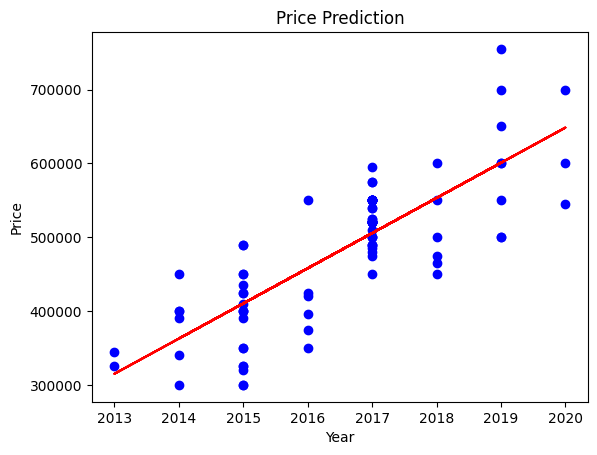

In [26]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.title('Price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')

In [27]:
predictions = model.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squraed Error : ',mean_squared_error(y_test,predictions))
print('R Squraed Error : ',r2_score(y_test,predictions))

Mean Squraed Error :  4326906256.829671
R Squraed Error :  0.36759313425902185


In [30]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50, max_iter=100, tol= 0.1)
model_l1 = lasso_reg.fit(x_train, y_train)

Text(0, 0.5, 'Price')

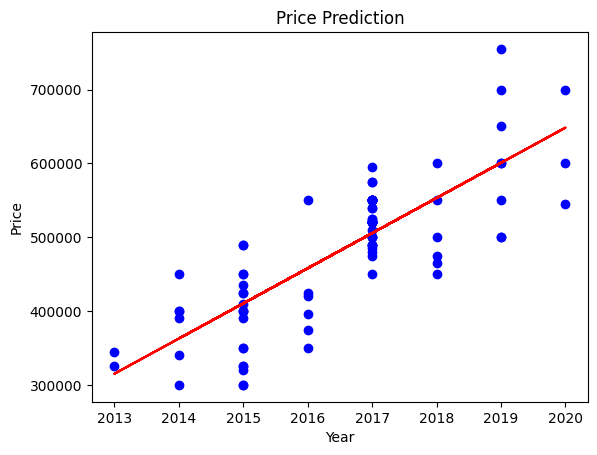

In [31]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, model_l1.predict(x_train), color = 'red')
plt.title('Price Prediction')
plt.xlabel('Year')
plt.ylabel('Price')

In [32]:
l1_predictions = model_l1.predict(x_test)

In [33]:
print('Mean Squraed Error : ',mean_squared_error(y_test,l1_predictions))
print('R Squraed Error : ',r2_score(y_test,l1_predictions))

Mean Squraed Error :  4324583417.148471
R Squraed Error :  0.36793263312384883


Reading an SQL Table

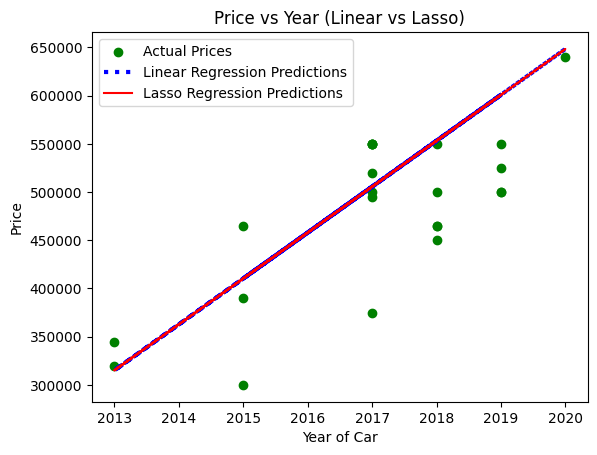

In [36]:
plt.scatter(x_test, y_test, color='green', label='Actual Prices')
plt.plot(x_test, predictions, color='blue', label='Linear Regression Predictions',linestyle=':', linewidth=3)
plt.plot(x_test, l1_predictions, color='red', label='Lasso Regression Predictions')
plt.xlabel('Year of Car')
plt.ylabel('Price')
plt.title('Price vs Year (Linear vs Lasso)')
plt.legend()
plt.show()

In [38]:
model.score(x_test,y_test)

0.36759313425902185

In [39]:
model_l1.score(x_test,y_test)

0.36793263312384883